In [2]:
library(mgsub)
library(gghalves)
library(reshape2)
library(tidyverse)
library(RColorBrewer)
library(boot)
library(corrplot)
library(asbio)

In [3]:
lowerTriangle <- function(m){
  return(m[lower.tri(m)])
}

cor_matrix_plot = function(data,range){
    options(repr.plot.width=10, repr.plot.height=10)
    corrplot(data,is.corr=FALSE,
             tl.pos="n", method = "color",
             #col.lim = range,
             cl.ratio = 0.05,
             col = gray(100:0/100)
             #col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(100)
            )
}

# Human rating model

## FAVEE model

In [4]:
human_258r_rating = read.csv('human_rating_data/study2_modern/CHN_dim_rel_NLP_258r_33d_scaled_chi.csv',row.names = 1)
rels_order_modern_258r = rownames(human_258r_rating)

# FAVEE model: favee
favee_258r_pc=read.csv('human_rating_data/human_model/CHN_258r_favee.csv',row.names=1) 
#colnames(favee_258r_pc) = paste0(colnames(favee_258r_pc),'.modern')
favee_258r_pc_dist = as.matrix(-dist(favee_258r_pc,method='euclidean'))
favee_258r =  c(-dist(favee_258r_pc,method='euclidean'))
max(favee_258r_pc_dist)
min(favee_258r_pc_dist)

# single dimension model: pcsdv
ns <- length(favee_258r_pc)
pcsds_258r <- list()
pcsdv_258r = data.frame(matrix(nrow = 258*257/2, ncol=5))
colnames(pcsdv_258r) = colnames(favee_258r_pc)
for (i in 1:5){
    pcsds_258r[[i]]<-as.matrix((-dist(favee_258r_pc[,i])))
    pcsdv_258r[[i]] = c(-dist(favee_258r_pc[,i])) # take proximities on each dimension
}
names(pcsds_258r) = colnames(favee_258r_pc)

[1] 0

[1] -6.680597

In [5]:
rels_order_ancient_120r = read.csv('human_rating_data/ancient_modern_map_120r.csv')$'对应的现代人际关系'
# FAVEE model: favee
favee_120r_pc=favee_258r_pc[rels_order_ancient_120r,]
#colnames(favee_120r_pc) = gsub('.modern','.ancient',colnames(favee_120r_pc))
favee_120r_pc_dist = as.matrix(-dist(favee_120r_pc,method='euclidean'))
favee_120r =  c(-dist(favee_120r_pc,method='euclidean'))
max(favee_120r_pc_dist)
min(favee_120r_pc_dist)

# single dimension model: pcsdv
ns <- length(favee_120r_pc)
pcsds_120r <- list()
pcsdv_120r = data.frame(matrix(nrow = 120*119/2, ncol=5))
colnames(pcsdv_120r) = colnames(favee_120r_pc)
for (i in 1:5){
    pcsds_120r[[i]]<-as.matrix((-dist(favee_120r_pc[,i])))
    pcsdv_120r[[i]] = c(-dist(favee_120r_pc[,i])) # take proximities on each dimension
}
names(pcsds_120r) = colnames(favee_120r_pc)

[1] 0

[1] -6.680597

## HPP model

In [6]:
# HPP model: hpp
hpp_258r_rdm = read.csv('human_rating_data/human_model/sim_human_258r_hpp.csv',row.names=1,check.names=FALSE)
#cor_matrix_plot(as.matrix(hpp_258r_rdm),c(-1,0))
hpp_258r = lowerTriangle(hpp_258r_rdm)

In [7]:
# HPP model: hpp
hpp_120r_rdm = hpp_258r_rdm[rels_order_ancient_120r,rels_order_ancient_120r]
write.csv(hpp_120r_rdm,'human_rating_data/human_model/sim_human_120r_hpp.csv')
hpp_120r = lowerTriangle(hpp_120r_rdm)

# Bert embedding

In [8]:
bert_emb_modern = read.csv('sim_bert_embedding/modern/q3.1_bert_embedding_data/MASK_embedding_output.csv',
                   row.names = 1, check.names = FALSE)
bert_emb_modern = bert_emb_modern[rels_order_modern_258r,rels_order_modern_258r]
bert_modern_array = lowerTriangle(bert_emb_modern)

#cor_matrix_plot(as.matrix(bert_emb_modern),c(-1,1))

In [9]:
bert_emb_ancient = read.csv('sim_bert_embedding/ancient/q3.2_bert_embedding_data/MASK_embedding_output.csv',
                   row.names = 1, check.names = FALSE)
bert_emb_ancient = bert_emb_ancient[rels_order_ancient_120r,rels_order_ancient_120r]
bert_ancient_array = lowerTriangle(bert_emb_ancient)

#cor_matrix_plot(as.matrix(bert_emb_ancient),c(-1,1))

# Ceiling performance

In [10]:
human_cosine_sim_258r = read.csv('human_rating_data/human_model/human_33d_258r_cosine.csv',row.names=1,check.names=FALSE)
human_cosine_sim_258r = human_cosine_sim_258r[rels_order_modern_258r,rels_order_modern_258r]
dim(human_cosine_sim_258r)
#cor_matrix_plot(as.matrix(human_cosine_sim_258r),c(-1,1))

[1] 258 258

In [11]:
human_cosine_sim_120r = read.csv('human_rating_data/human_model/human_33d_120r_cosine.csv',row.names=1,check.names=FALSE)
human_cosine_sim_120r = human_cosine_sim_120r[rels_order_ancient_120r,rels_order_ancient_120r]
dim(human_cosine_sim_120r)
#cor_matrix_plot(as.matrix(human_cosine_sim_120r),c(-1,1))

[1] 120 120

# Spearman correlation

## modern: 258 relationships

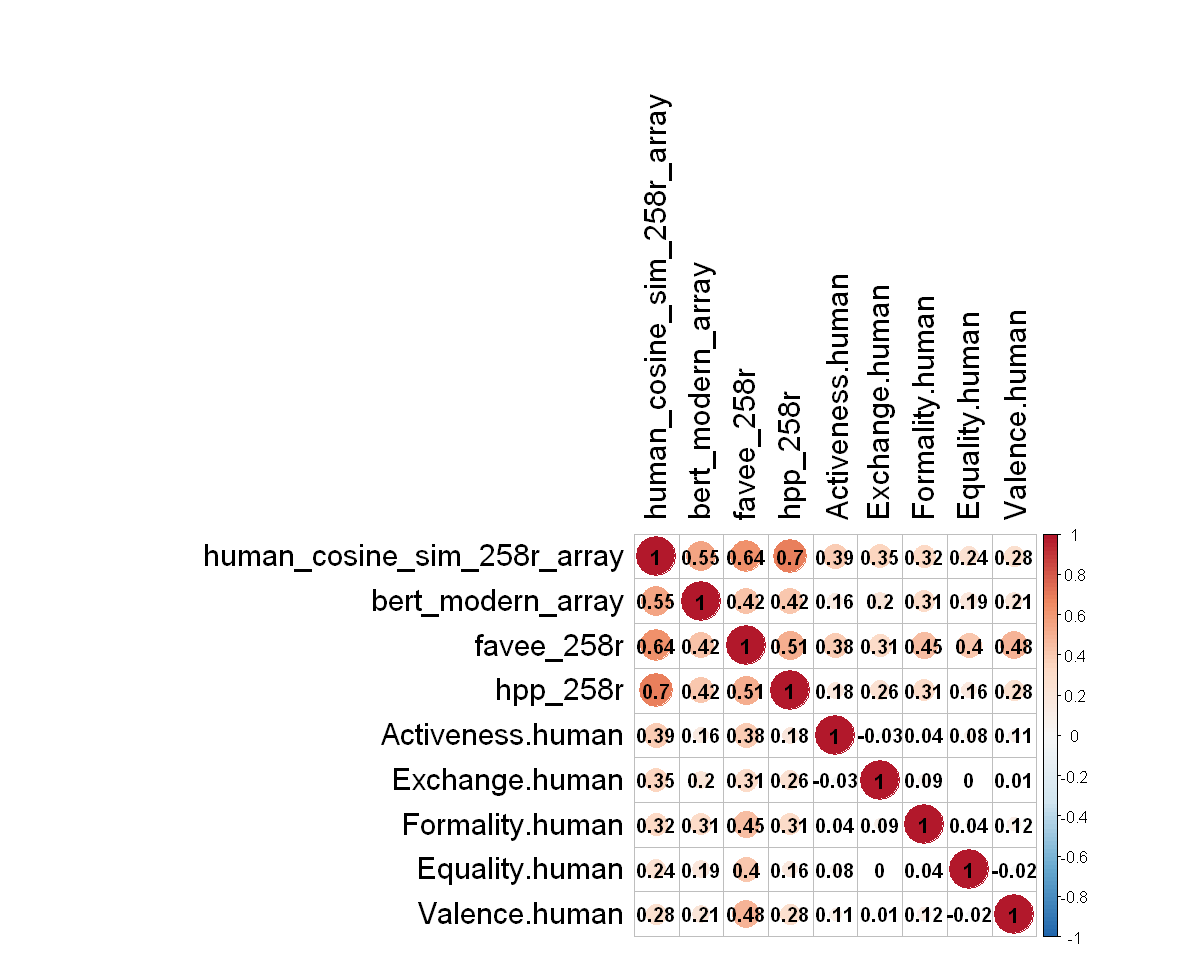

In [12]:
# ceiling performance
human_cosine_sim_258r_array = lowerTriangle(human_cosine_sim_258r)

model_geo_combine = cbind(human_cosine_sim_258r_array,# ceiling performance
                          bert_modern_array,#bert_modern
                          favee_258r,
                          hpp_258r,
                          pcsdv_258r)
model_geo_cor = cor(model_geo_combine, method = 'spearman')

options(repr.plot.width=10, repr.plot.height=8)
corrplot(as.matrix(model_geo_cor),is.corr=FALSE,
         addCoef.col = "black",
         tl.col="black",tl.cex=1.5,
         col.lim = c(-1,1),
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(100))

In [13]:
modern_cvals = model_geo_cor[1:2,3:9]
colnames(modern_cvals)[1] = c('FAVEE')
colnames(modern_cvals)[2] = c('HPP')
rownames(modern_cvals) = c('human','modern')
modern_cvals

,FAVEE,HPP,Activeness.human,Exchange.human,Formality.human,Equality.human,Valence.human
human,0.6399599,0.6951780,0.3850011,0.3474693,0.3246507,0.2405418,0.2773140
modern,0.4214429,0.4195967,0.1577529,0.2049697,0.3088391,0.1904081,0.2103566


## ancient: 120 relationships

favee_120r         hpp_120r Activeness.human   Exchange.human 
       0.3086127        0.3174228        0.1242517        0.1298805 
 Formality.human   Equality.human    Valence.human 
       0.1372492        0.1701902        0.1584354

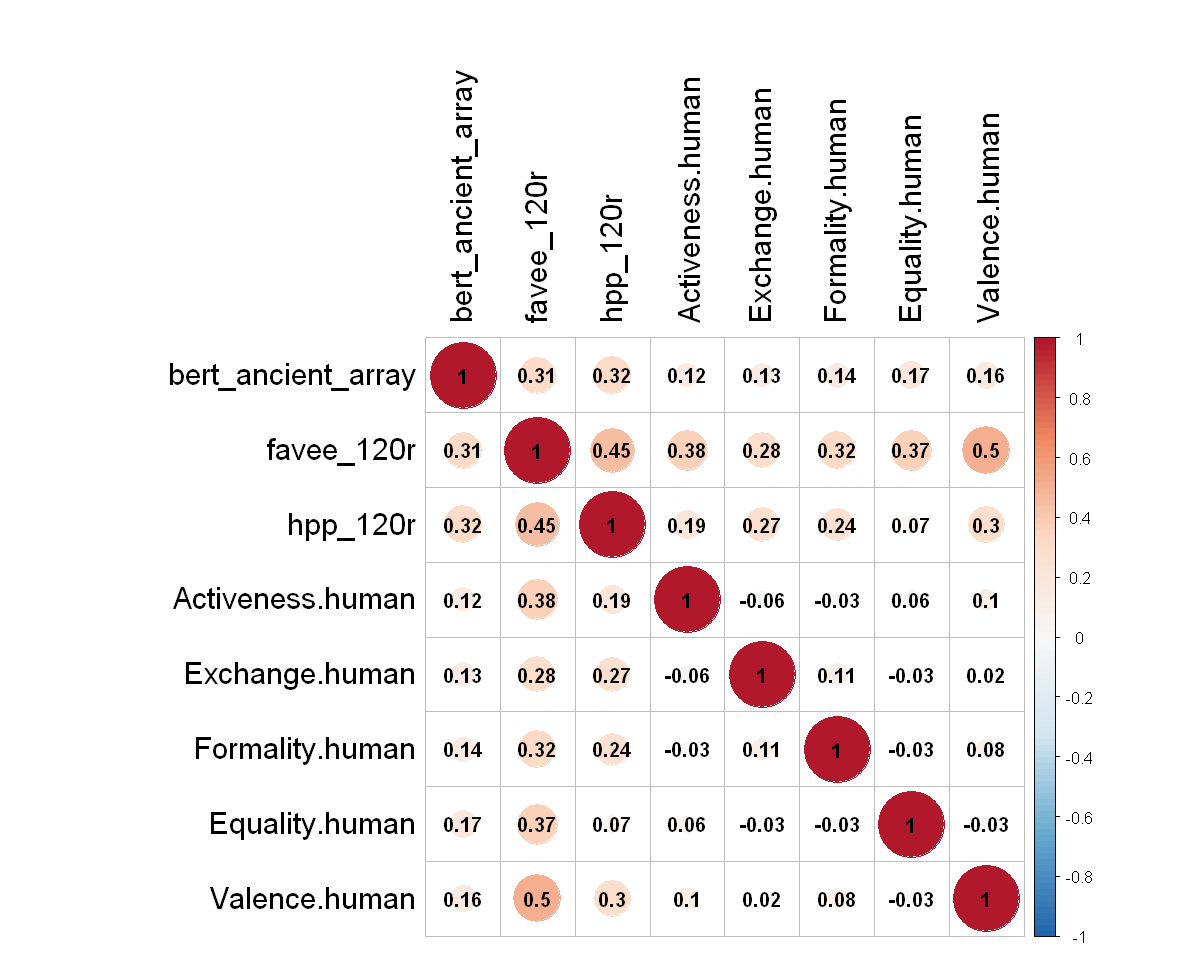

In [14]:
model_geo_combine = cbind(bert_ancient_array,#bert_ancient
                          favee_120r,
                          hpp_120r,
                          pcsdv_120r)
model_geo_cor = cor(model_geo_combine, method = 'spearman')

options(repr.plot.width=10, repr.plot.height=8)
corrplot(as.matrix(model_geo_cor),is.corr=FALSE,
         addCoef.col = "black",
         tl.col="black",tl.cex=1.5,
         col.lim = c(-1,1),
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(100))
ancient_cvals = model_geo_cor[1,2:8]
ancient_cvals

In [15]:
cvals = rbind(modern_cvals,ancient_cvals)
rownames(cvals) = c('human','modern','ancient')
cvals

cvals_full = cvals[,1:2]
cvals_full

cvals_single = cvals[,3:7]
cvals_single

,FAVEE,HPP,Activeness.human,Exchange.human,Formality.human,Equality.human,Valence.human
human,0.6399599,0.6951780,0.3850011,0.3474693,0.3246507,0.2405418,0.2773140
modern,0.4214429,0.4195967,0.1577529,0.2049697,0.3088391,0.1904081,0.2103566
ancient,0.3086127,0.3174228,0.1242517,0.1298805,0.1372492,0.1701902,0.1584354


,FAVEE,HPP
human,0.6399599,0.6951780
modern,0.4214429,0.4195967
ancient,0.3086127,0.3174228


,Activeness.human,Exchange.human,Formality.human,Equality.human,Valence.human
human,0.3850011,0.3474693,0.3246507,0.2405418,0.2773140
modern,0.1577529,0.2049697,0.3088391,0.1904081,0.2103566
ancient,0.1242517,0.1298805,0.1372492,0.1701902,0.1584354


In [16]:
rowMeans(cvals_single)

human    modern   ancient 
0.3149954 0.2144653 0.1440014

# Permutation test and Confidence intervals

In [17]:
# Create the predicted model
geo_list = list()
geo_list[['human']] = human_cosine_sim_258r_array # ceiling performance
geo_list[['modern']] = bert_modern_array
geo_list[['ancient']] = bert_ancient_array

## FAVEE and HPP model

In [18]:
pre_258r_model = list()
pre_258r_model[['FAVEE']] = favee_258r_pc_dist
pre_258r_model[['HPP']] = hpp_258r_rdm

pre_120r_model = list()
pre_120r_model[['FAVEE']] = favee_120r_pc_dist
pre_120r_model[['HPP']] = hpp_120r_rdm

In [19]:
permres_full_model <- array(NA,c(3,2,1000)) # 3=human,modern,ancient; 2=favee,hpp
dimnames(permres_full_model) = list(c('human','modern','ancient'),c('FAVEE','HPP'))

for (i in 1:1000){
    for (geo in c('human','modern','ancient')){
        sel = sample(258)# row/column order randomization index
        pre_model = pre_258r_model
        if (geo == 'ancient'){
            sel = sample(120)
            pre_model = pre_120r_model
        }
        for (model in names(pre_model)){
            permat <- pre_model[[model]][sel,sel] # randomize predictors
            permres_full_model[geo,model,i]<-cor(lowerTriangle(permat),geo_list[[geo]],
                                                 method = 'spearman')
        }
    }
}

In [20]:
save(permres_full_model,file = "permutation/permres_full_model.Rdata")

In [21]:
load("permutation/permres_full_model.Rdata")

In [22]:
pvals <- matrix(NA,3,2)
rownames(pvals) = c('human','modern','ancient')
colnames(pvals) = c('FAVEE','HPP')

for(geo in c('human','modern','ancient')){
  for (model in c('FAVEE','HPP')){
    # p-values = prop. of permuted test stats > actual  
    pvals[geo,model] <- mean(permres_full_model[geo,model,] > cvals_full[geo,model]) 
  }
}
sig <- pvals<.025 # two-tailed test, so p = .05/2 = .025
sig
# confidence intrvals from shifted/flipped permtuation null dist.
cis_full <- apply(-permres_full_model,c(1,2),quantile,c(.025,.975)) 

,FAVEE,HPP
human,TRUE,TRUE
modern,TRUE,TRUE
ancient,TRUE,TRUE


In [23]:
cis_full

, , FAVEE

            human       modern     ancient
2.5%  -0.01685089 -0.010669304 -0.02559355
97.5%  0.01437288  0.009345293  0.01958699

, , HPP

             human       modern     ancient
2.5%  -0.013764968 -0.011990658 -0.02762905
97.5%  0.007811629  0.008601097  0.01852368

## single dimension

In [24]:
permres_single_model <- array(NA,c(3,5,1000)) # 3=human,modern,ancient; 5 single dimensions
dimnames(permres_single_model) = list(c('human','modern','ancient'),
                c('Formality.human','Activeness.human','Valence.human','Exchange.human','Equality.human'))

for (i in 1:1000){
    for (geo in c('human','modern','ancient')){
        sel = sample(258)# row/column order randomization index
        pre_model = pcsds_258r
        if (geo == 'ancient'){
            sel = sample(120)
            pre_model = pcsds_120r
        }
        for (model in names(pre_model)){
            permat <- pre_model[[model]][sel,sel] # randomize predictors
            permres_single_model[geo,model,i]<-cor(lowerTriangle(permat),geo_list[[geo]],
                                                   method = 'spearman')
        }
    }
}

In [25]:
save(permres_single_model,file = "permutation/permres_single_model.Rdata")

In [26]:
load("permutation/permres_single_model.Rdata")

In [27]:
pvals <- matrix(NA,3,5)
rownames(pvals) = c('human','modern','ancient')
colnames(pvals) = c('Formality.human','Activeness.human','Valence.human','Exchange.human','Equality.human')

for(geo in c('human','modern','ancient')){
  for (model in c('Formality.human','Activeness.human','Valence.human','Exchange.human','Equality.human')){
    # p-values = prop. of permuted test stats > actual  
    pvals[geo,model] <- mean(permres_single_model[geo,model,] > cvals_single[geo,model]) 
  }
}
sig <- pvals<.025 # two-tailed test, so p = .05/2 = .025
sig
# confidence intrvals from shifted/flipped permtuation null dist.
cis_single <- apply(-permres_single_model,c(1,2),quantile,c(.025,.975)) 

,Formality.human,Activeness.human,Valence.human,Exchange.human,Equality.human
human,TRUE,TRUE,TRUE,TRUE,TRUE
modern,TRUE,TRUE,TRUE,TRUE,TRUE
ancient,TRUE,TRUE,TRUE,TRUE,TRUE


# Plot results

In [28]:
my.color = c('human'="#F2997A",'modern'="#a17db4",'ancient'="#9DCD82")

## FAVEE and HPP model

In [29]:
#rvalue_interval 
cvals_cis_full = melt(cvals_full)
colnames(cvals_cis_full)[1] = 'geo'
colnames(cvals_cis_full)[2] = 'model'
# add interval
# cvals_cis_full$'lower' = cis_full[seq(1, length(cis_full), by = 2)]
# cvals_cis_full$'upper' = cis_full[seq(2, length(cis_full), by = 2)]
# cvals_cis_full = cvals_cis_full %>% mutate(lower = lower+value,
#                                  upper = upper+value)
cvals_cis_full$model = factor(cvals_cis_full$model,
                        levels = rev(c('FAVEE','HPP')))
cvals_cis_full$geo = factor(cvals_cis_full$geo,
                      levels = c('human','modern','ancient'))

########################################################################
df <- data.frame(geo = character(), model = character(), value = numeric())
permres = permres_full_model
for (geo_name in dimnames(permres)[[1]]) {
  for (model_name in dimnames(permres)[[2]]) {
    temp <- data.frame(
      geo = geo_name, 
      model = model_name, 
      value = permres[geo_name, model_name, ]
    )
    
    df <- bind_rows(df, temp)
  }
}
df$model = factor(df$model,levels = rev(c('FAVEE','HPP')))
df$geo = factor(df$geo,levels = c('human','modern','ancient'))
df = df[df$'geo' %in% c('modern','ancient'),]
df$'X' = paste(df$'geo',df$'model',sep='_')
df$'X' = factor(df$'X',levels = c('ancient_HPP','ancient_FAVEE','modern_HPP','modern_FAVEE'))

In [30]:
write.csv(cvals_cis_full, 'permutation/cvals_cis_favee_hpp.csv')
write.csv(df, 'permutation/favee_hpp.csv')

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


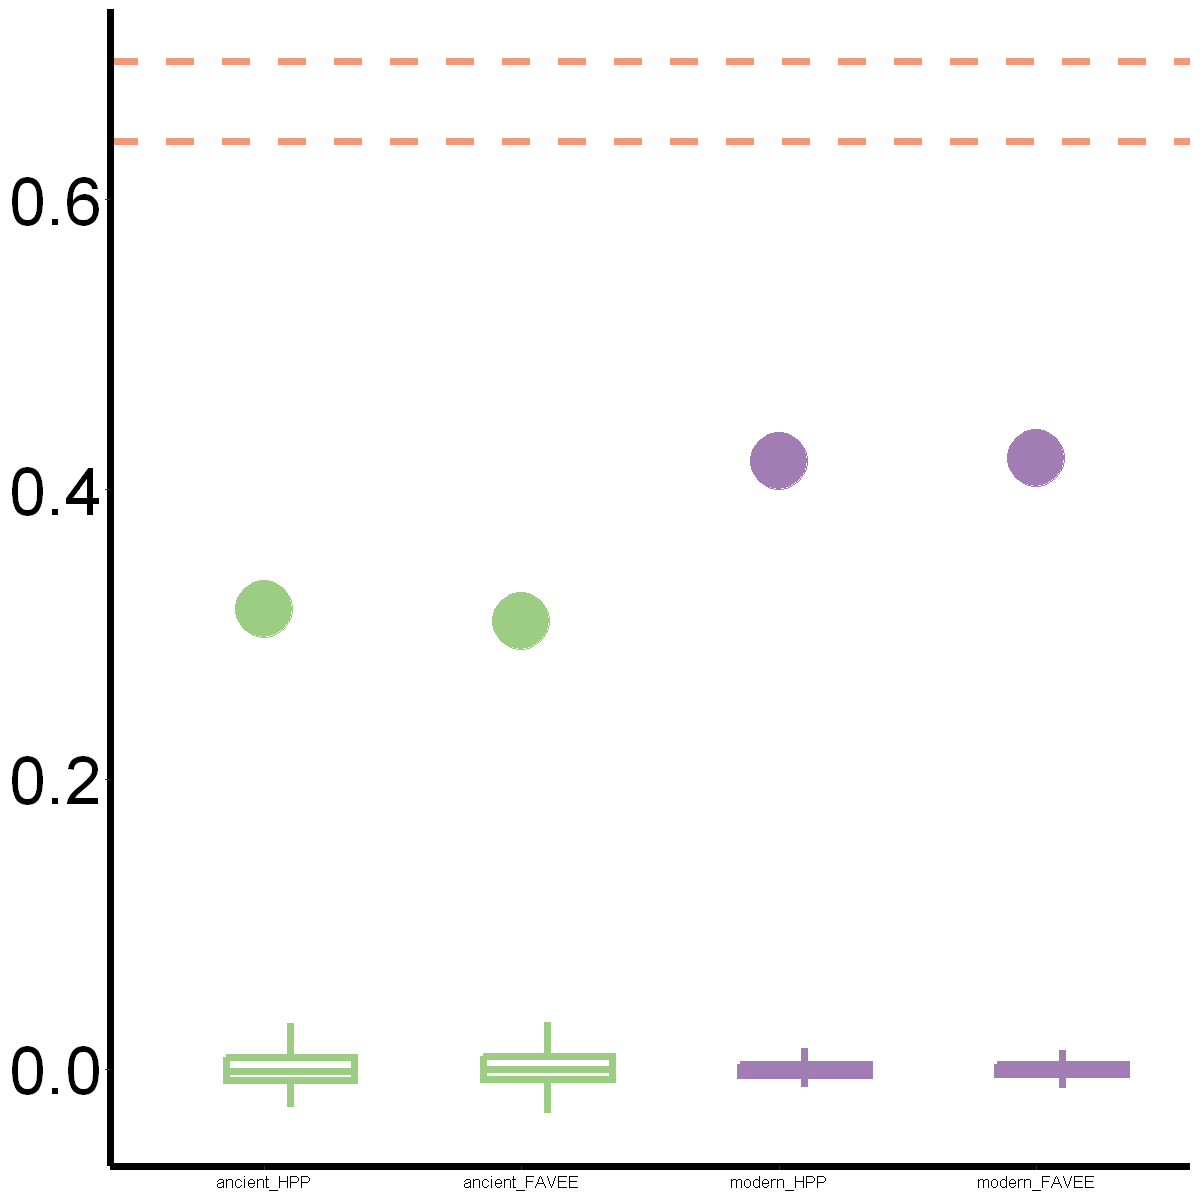

In [31]:
options(repr.plot.width=10,repr.plot.height=10)
#cvals_cis = cvals_cis_full[cvals_cis_full$'geo'%in%c('modern','ancient'),]
cvals_cis = cvals_cis_full
cvals_cis$'X' = paste(cvals_cis$'geo',cvals_cis$'model',sep='_')
cvals_cis$'X' = factor(cvals_cis$'X',
                       levels = c('ancient_HPP','ancient_FAVEE',
                                  'modern_HPP','modern_FAVEE'))

ggplot() +
# plot distribution
geom_boxplot(data=df[df$'geo'%in%c('modern','ancient'),],aes(x=X,y=value,color=geo),
             fatten = 1,
              position=position_nudge(x=0.1,y=0),alpha=1,
              outlier.shape = NA,width = 0.5, lwd = 2)+
# plot RSA correlation
geom_point(data=cvals_cis[cvals_cis$'geo' %in% c('modern','ancient'),], 
           aes(x=X, y=value,color=geo),size=16)+
# geom_segment(data=cvals_cis,aes(x=X,color=geo,xend=X,y=lower,yend=upper),
#              size=6,alpha=0.3)+
geom_hline(yintercept=cvals_cis[cvals_cis$'geo'=='human','value'][1], linetype='dashed',linewidth = 2,color="#F2997A")+
geom_hline(yintercept=cvals_cis[cvals_cis$'geo'=='human','value'][2], linetype='dashed',linewidth = 2,color="#F2997A")+
#coord_flip()+
scale_color_manual(values=my.color)+
scale_fill_manual(values=my.color)+
theme_classic()+
theme(axis.title = element_blank(),
      #axis.text.y = element_blank(),
      axis.text.y = element_text(size=40,color="black"),
      axis.text.x = element_text(size=10,color="black"),
      axis.line = element_line(linetype=1,color="black",size=2),    
      legend.title = element_blank(),
      legend.text = element_text(size=24),
      legend.position = 'none'
     )

In [32]:
png("output_graph/favee_hpp_predictive.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=300)
options(repr.plot.width=10,repr.plot.height=10)
#cvals_cis = cvals_cis_full[cvals_cis_full$'geo'%in%c('modern','ancient'),]
cvals_cis = cvals_cis_full
cvals_cis$'X' = paste(cvals_cis$'geo',cvals_cis$'model',sep='_')
cvals_cis$'X' = factor(cvals_cis$'X',
                       levels = c('ancient_HPP','ancient_FAVEE',
                                  'modern_HPP','modern_FAVEE'))

ggplot() +
# plot distribution
geom_boxplot(data=df[df$'geo'%in%c('modern','ancient'),],aes(x=X,y=value,color=geo),
             fatten = 1,
              position=position_nudge(x=0.1,y=0),alpha=1,
              outlier.shape = NA,width = 0.5, lwd = 2)+
# plot RSA correlation
geom_point(data=cvals_cis[cvals_cis$'geo' %in% c('modern','ancient'),], 
           aes(x=X, y=value,color=geo),size=16)+
# geom_segment(data=cvals_cis,aes(x=X,color=geo,xend=X,y=lower,yend=upper),
#              size=6,alpha=0.3)+
geom_hline(yintercept=cvals_cis[cvals_cis$'geo'=='human','value'][1], linetype='dashed',linewidth = 2,color="#F2997A")+
geom_hline(yintercept=cvals_cis[cvals_cis$'geo'=='human','value'][2], linetype='dashed',linewidth = 2,color="#F2997A")+
#coord_flip()+
scale_color_manual(values=my.color)+
scale_fill_manual(values=my.color)+
theme_classic()+
theme(axis.title = element_blank(),
      #axis.text.y = element_blank(),
      axis.text.y = element_text(size=40,color="black"),
      axis.text.x = element_text(size=10,color="black"),
      axis.line = element_line(linetype=1,color="black",size=2),    
      legend.title = element_blank(),
      legend.text = element_text(size=24),
      legend.position = 'none'
     )
dev.off()

png 
  2

## single dimension

In [33]:
#rvalue_interval 
cvals_cis_single = melt(cvals_single)
colnames(cvals_cis_single)[1] = 'geo'
colnames(cvals_cis_single)[2] = 'model'
cvals_cis_single = cvals_cis_single[cvals_cis_single$'geo'%in% c('ancient','modern'),]
# add interval
# cvals_cis_single$'lower' = cis_single[seq(1, length(cis_single), by = 2)]
# cvals_cis_single$'upper' = cis_single[seq(2, length(cis_single), by = 2)]
# cvals_cis_single = cvals_cis_single %>% mutate(lower = lower+value,
#                                  upper = upper+value)
cvals_cis_single$model = factor(cvals_cis_single$model,
    levels = rev(c('Formality.human','Activeness.human','Valence.human','Exchange.human','Equality.human')))
cvals_cis_single$geo = factor(cvals_cis_single$geo,
   levels = c('ancient','modern'))

########################################################################
df <- data.frame(geo = character(), model = character(), value = numeric())
permres = permres_single_model
for (geo_name in dimnames(permres)[[1]]) {
  for (model_name in dimnames(permres)[[2]]) {
    temp <- data.frame(
      geo = geo_name, 
      model = model_name, 
      value = permres[geo_name, model_name, ]
    )
    
    df <- bind_rows(df, temp)
  }
}
df = df[df$geo %in% c('modern','ancient'),]
df$model = factor(df$model,
 levels = c('Formality.human','Activeness.human','Valence.human','Exchange.human','Equality.human'))
df$geo = factor(df$geo,levels = c('ancient','modern'))

In [34]:
write.csv(cvals_cis_single, 'permutation/cvals_cis_single_dimension.csv')
write.csv(df, 'permutation/single_dimension.csv')

In [35]:
diff_favee_list = c()
for (m in unique(cvals_cis_single$model)){
    model_value = cvals_cis_single[cvals_cis_single$model==m,'value']
    diff_value = model_value[1] - model_value[2]
    diff_favee_list = c(diff_favee_list, diff_value)
}
diff_favee = data.frame(diff = diff_favee_list, 
                        model = unique(cvals_cis_single$model),
                        start = cvals_cis_single[cvals_cis_single$geo=='ancient','value'])
diff_favee

diff,model,start
<dbl>,<fct>,<dbl>
0.03350129,Activeness.human,0.1242517
0.07508918,Exchange.human,0.1298805
0.17158989,Formality.human,0.1372492
0.02021794,Equality.human,0.1701902
0.05192119,Valence.human,0.1584354


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


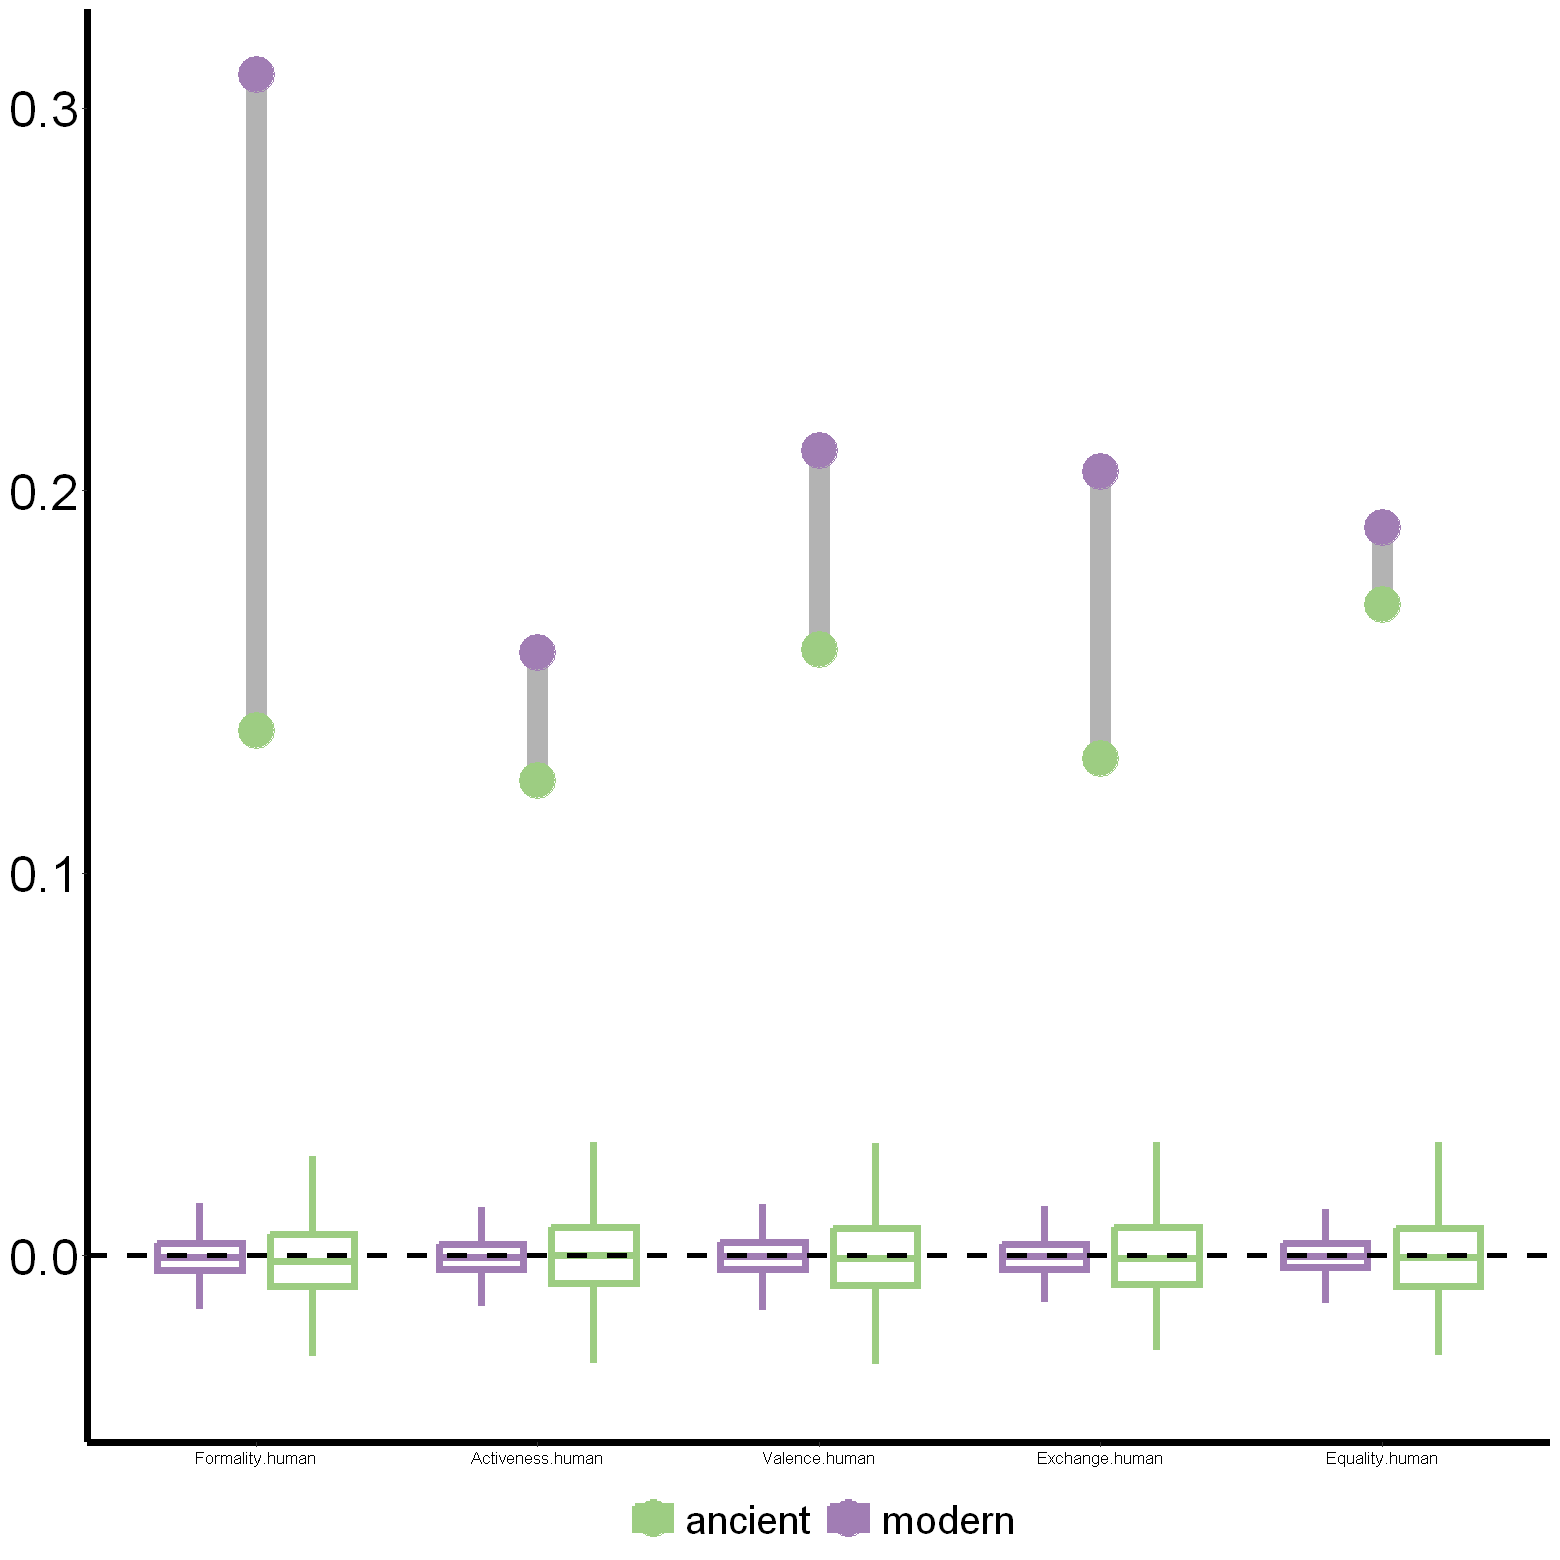

In [36]:
options(repr.plot.width=13,repr.plot.height=13)
cvals_cis = cvals_cis_single
ggplot() +
# plot distribution
# geom_half_violin(data=df,aes(x=model,y=value,color=geo,fill=geo),
#               position=position_nudge(x=0.1,y=0),
#               side='L',adjust=1.2,trim=F,color=NA,alpha=0.3)+
geom_boxplot(data=df[df$geo=='modern',],aes(x=model,y=value,color=geo),
             fatten = 1,position=position_nudge(x=-0.2),alpha=1,outlier.shape = NA,width = 0.3, lwd = 2)+
geom_boxplot(data=df[df$geo=='ancient',],aes(x=model,y=value,color=geo),
fatten = 1,position=position_nudge(x=0.2),alpha=1,outlier.shape = NA,width = 0.3, lwd = 2)+
             
# plot RSA correlation
geom_segment(data=diff_favee,aes(x=model,xend=model,y=start,yend=start+diff),
             size=6,alpha=0.3)+
geom_point(data=cvals_cis, aes(x=model, y=value,color=geo),size=10)+

scale_color_manual(values=my.color)+
scale_fill_manual(values=my.color)+
geom_hline(yintercept = 0,linetype='dashed',linewidth = 1.5)+
theme_classic()+
#coord_flip()+
theme(axis.title = element_blank(),
      #axis.text.y = element_blank(),
      axis.text.y = element_text(size=30,color="black"),
      axis.text.x = element_text(size=10,color="black"),
      axis.line = element_line(linetype=1,color="black",size=2),    
      legend.title = element_blank(),
      legend.text = element_text(size=24),
      legend.position = 'bottom'
     )

In [37]:
png("output_graph/single_dimension_predictive.png", bg="transparent",
    family = 'sans',units='in',width=13,height=13,res=300)

options(repr.plot.width=13,repr.plot.height=13)
cvals_cis = cvals_cis_single
ggplot() +
# plot distribution
# geom_half_violin(data=df,aes(x=model,y=value,color=geo,fill=geo),
#               position=position_nudge(x=0.1,y=0),
#               side='L',adjust=1.2,trim=F,color=NA,alpha=0.3)+
geom_boxplot(data=df[df$geo=='modern',],aes(x=model,y=value,color=geo),
             fatten = 1,position=position_nudge(x=-0.2),alpha=1,outlier.shape = NA,width = 0.3, lwd = 2)+
geom_boxplot(data=df[df$geo=='ancient',],aes(x=model,y=value,color=geo),
fatten = 1,position=position_nudge(x=0.2),alpha=1,outlier.shape = NA,width = 0.3, lwd = 2)+
             
# plot RSA correlation
geom_segment(data=diff_favee,aes(x=model,xend=model,y=start,yend=start+diff),
             size=6,alpha=0.3)+
geom_point(data=cvals_cis, aes(x=model, y=value,color=geo),size=10)+

scale_color_manual(values=my.color)+
scale_fill_manual(values=my.color)+
geom_hline(yintercept = 0,linetype='dashed',linewidth = 1.5)+
theme_classic()+
#coord_flip()+
theme(axis.title = element_blank(),
      #axis.text.y = element_blank(),
      axis.text.y = element_text(size=30,color="black"),
      axis.text.x = element_text(size=10,color="black"),
      axis.line = element_line(linetype=1,color="black",size=2),    
      legend.title = element_blank(),
      legend.text = element_text(size=24),
      legend.position = 'bottom'
     )
dev.off()

png 
  2